In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
# from impedance.models.circuits import CustomCircuit
# from impedance.visualization import plot_nyquist # Kept if you want to switch plotting methods

In [2]:
# --- Data Loading ---

def EIS_z60_import(filename):
    """ Import z60 file as pandas dataframe."""
    df = pd.read_csv(
        filename,
        skiprows=11,
        sep='\s+',
        header=None,
        names=["Freq", "Ampl", "Bias", "Time", "Z'", "Z''", "GD", "Err", "Range"],
        index_col="Freq")

    df = df.drop(columns=['Ampl', 'Bias', 'Time', 'GD', 'Err', 'Range']) # Drop columns
    mask = (df["Z'"] > 0) & (df["Z''"] < 0) # Only keep first quadrant in Nyquist plot

    df['Z'] = np.sqrt( (df["Z'"].to_numpy())**2 + \
                       (df["Z'"].to_numpy())**2 )

    df['theta'] = np.arctan2(-df["Z'"].to_numpy(), df["Z''"].to_numpy()) * 180 / np.pi
    
    df[~mask] = None
    return df
    
try:
    HS_EIS_10mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_10mV_1.z60")
    HS_EIS_10mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_10mV_4.z60")
    HS_EIS_10mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_10mV_5.z60")
    
    CS_EIS_10mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_10mV_4.z60")
    CS_EIS_10mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_10mV_5.z60")
    CS_EIS_10mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_10mV_6.z60")

    HS_EIS_20mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_20mV_3.z60")
    HS_EIS_20mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_20mV_4.z60")
    HS_EIS_20mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_20mV_5.z60")
    
    CS_EIS_20mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_20mV_4.z60")
    CS_EIS_20mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_20mV_5.z60")
    CS_EIS_20mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_20mV_6.z60")

    HS_EIS_20mV_1_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_30mV_3.z60")
    HS_EIS_20mV_2_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_30mV_4.z60")
    HS_EIS_20mV_3_df = EIS_z60_import("./HIPed_Stellite1_EIS/HIPedStellite1_EIS_30mV_5.z60")
    
    CS_EIS_30mV_1_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_30mV_4.z60")
    CS_EIS_30mV_2_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_30mV_5.z60")
    CS_EIS_30mV_3_df = EIS_z60_import("./Cast_Stellite1_EIS/CastStellite1_EIS_30mV_6.z60")
        
except FileNotFoundError as e:
    print(f"Error: File was not found.")
    print(e.message)
    print(e.args)
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

#CS_EIS_10mV_1_df

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\grokkingDoctorow\AppData\Local\Temp\ipykernel_11920\896768106.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


In [3]:
CS_EIS_10mV_3_df

Z'          Z''             Z       theta
Freq                                                           
10000.000000     12.5765     -2.57571     17.785857 -101.574316
8902.150000      12.7553     -2.63029     18.038718 -101.651727
7924.830000      12.9070     -2.70532     18.253254 -101.837881
7054.800000      13.0297     -2.75406     18.426778 -101.934822
6280.290000      13.1284     -2.83963     18.566361 -102.204876
...                  ...          ...           ...         ...
0.146085      45787.6000 -27678.80000  64753.444909 -121.153141
0.130047      48851.8000 -14103.70000  69086.878106 -106.103629
0.115770      51948.7000 -22140.40000  73466.556088 -113.083576
0.103060      54367.5000 -20215.50000  76887.255852 -110.396674
0.100000      58844.6000  -1989.13000  83218.831392  -91.936038

[100 rows x 4 columns]

In [4]:
CS_df_10mV_concat = pd.concat([CS_EIS_10mV_1_df, CS_EIS_10mV_2_df, CS_EIS_10mV_3_df])
CS_df_10mV_means = CS_df_10mV_concat.groupby(CS_df_10mV_concat.index).mean()
CS_df_10mV_err = CS_df_10mV_concat.groupby(CS_df_10mV_concat.index).std()


CS_df_20mV_concat = pd.concat([CS_EIS_20mV_1_df, CS_EIS_20mV_2_df, CS_EIS_20mV_3_df])
CS_df_20mV_means = CS_df_20mV_concat.groupby(CS_df_20mV_concat.index).mean()
CS_df_20mV_err = CS_df_20mV_concat.groupby(CS_df_20mV_concat.index).std()


CS_df_30mV_concat = pd.concat([CS_EIS_30mV_1_df, CS_EIS_30mV_2_df, CS_EIS_30mV_3_df])
CS_df_30mV_means = CS_df_30mV_concat.groupby(CS_df_30mV_concat.index).mean()
CS_df_30mV_err = CS_df_30mV_concat.groupby(CS_df_30mV_concat.index).std()

In [5]:
CS_df_10mV_means

Z'           Z''             Z       theta
Freq                                                              
0.100000      59050.866667 -17322.843333  83510.536510 -105.334167
0.103060      50340.266667 -24670.100000  71191.887853 -115.383424
0.115770      50163.733333 -16974.176667  70942.232019 -108.254808
0.130047      51095.800000 -13287.680000  72260.373340 -104.542029
0.146085      50253.150000 -24036.550000  71068.686282 -115.797077
...                    ...           ...           ...         ...
6280.290000      13.114167     -2.848980     18.546232 -102.256758
7054.800000      13.007667     -2.765090     18.395619 -102.000994
7924.830000      12.879067     -2.707930     18.213751 -101.874000
8902.150000      12.733233     -2.640447     18.007511 -101.715239
10000.000000     12.559867     -2.590203     17.762334 -101.652703

[100 rows x 4 columns]

## Plotting average data in Bode Plot

In [6]:
print(f"Theta mean error 10mV {CS_df_10mV_err['theta'].mean()}%")
print(f"|Z| mean error 10mV {CS_df_10mV_err['Z'].mean()}%")

print(f"Theta mean error 20mV {CS_df_20mV_err['theta'].mean()}%")
print(f"|Z| mean error 20mV {CS_df_20mV_err['Z'].mean()}%")

print(f"Theta mean error 30mV {CS_df_30mV_err['theta'].mean()}%")
print(f"|Z| mean error 30mV {CS_df_30mV_err['Z'].mean()}%")

Theta mean error 10mV 3.5704617636521845%
|Z| mean error 10mV 2181.6842491538905%
Theta mean error 20mV 2.529684450405601%
|Z| mean error 20mV 1125.8577821194306%
Theta mean error 30mV 2.127136491943271%
|Z| mean error 30mV 968.8399346542678%


Clearly, the phase shift error is far higher than the gain, but it would be a mistake to say that gain is less reliable than the phase shift. The error with the gain, likely due to noise at low frequencies, appears more reasonable when the data is plotted on a log axis.


[]

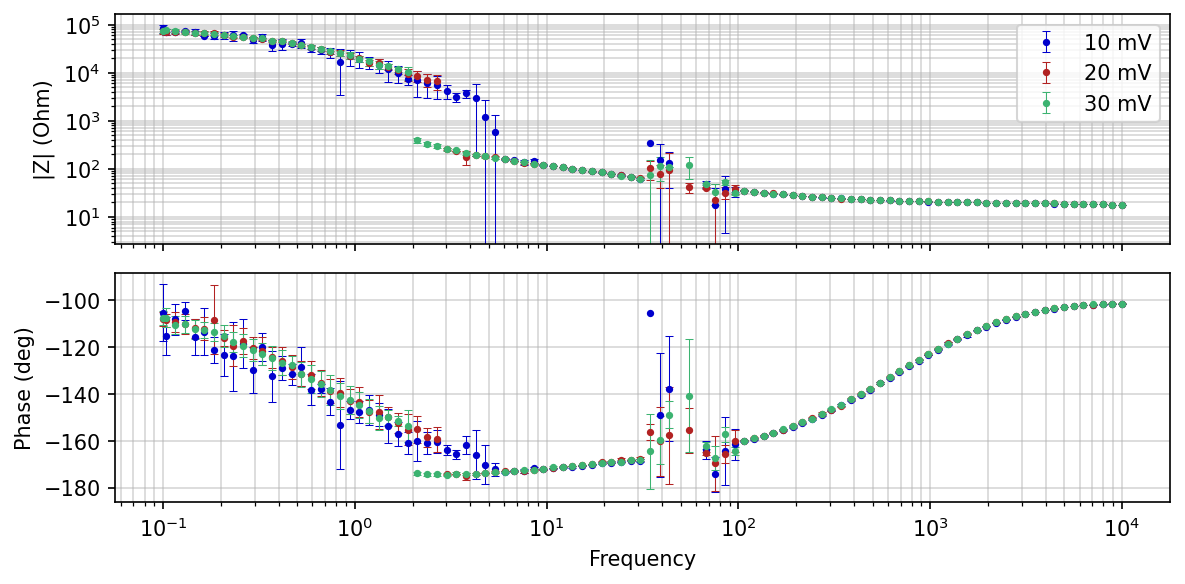

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,4), sharex=True, dpi=150)

ax1.errorbar(CS_df_10mV_means.index.to_numpy(), CS_df_10mV_means["Z"].to_numpy(), CS_df_10mV_err["Z"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="10 mV")
ax1.errorbar(CS_df_20mV_means.index.to_numpy(), CS_df_20mV_means["Z"].to_numpy(), CS_df_20mV_err["Z"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="20 mV")
ax1.errorbar(CS_df_30mV_means.index.to_numpy(), CS_df_30mV_means["Z"].to_numpy(), CS_df_30mV_err["Z"].to_numpy(),
             fmt = '.', color='mediumseagreen', markersize=5, 
             ecolor="mediumseagreen", elinewidth=0.50, capsize=2, capthick=0.50,
             label="30 mV")

ax2.errorbar(CS_df_10mV_means.index.to_numpy(), CS_df_10mV_means["theta"].to_numpy(), CS_df_10mV_err["theta"].to_numpy(),
             fmt = '.', color='mediumblue', markersize=5, 
             ecolor="mediumblue", elinewidth=0.50, capsize=2, capthick=0.50,
             label="10 mV")
ax2.errorbar(CS_df_20mV_means.index.to_numpy(), CS_df_20mV_means["theta"].to_numpy(), CS_df_20mV_err["theta"].to_numpy(),
             fmt = '.', color='firebrick', markersize=5, 
             ecolor="firebrick", elinewidth=0.50, capsize=2, capthick=0.50,
             label="20 mV")
ax2.errorbar(CS_df_30mV_means.index.to_numpy(), CS_df_30mV_means["theta"].to_numpy(), CS_df_30mV_err["theta"].to_numpy(),
             fmt = '.', color='mediumseagreen', markersize=5, 
             ecolor="mediumseagreen", elinewidth=0.50, capsize=2, capthick=0.50,
             label="30 mV")

ax1.grid(True, which="both", ls="-", alpha=0.5)
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

#ax2.xaxis.set_major_locator(plt.MaxNLocator(11))
ax1.set_ylabel('|Z| (Ohm)')
ax2.set_ylabel('Phase (deg)')
ax2.set_xlabel("Frequency")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")

plt.tight_layout()
plt.plot()

Okay, the errors with the impedence shift clearly show that:

    20mV is less reliable than 10mV at high frequencies, likely due to non-linearity,
    20mV is more reliable than 10 mV at low frequencies, or atleast, lower frequencies than 10mV

Makes me think that I need to use higher excitation voltages at low frequencies, although I've only seen 10mV and 20mV in research. this paper does 30mV! https://www.mdpi.com/2076-3417/14/13/5754

Then again, I've never seen errorbars on a Bode plot in a research paper

Source of discontinuities: https://www.gamry.com/Framework%20Help/HTML5%20-%20Tripane%20-%20Audience%20A/Content/UT/Discontinuities%20in%20CS_EIS%20Spectra.htm


## Plotting average data on Nyquist plot

So let's have a look at how the Nyquist plot looks, with and without the sketchy data
So we'll remove everything below 10 Hz, plus remove the weird region at 50Hz

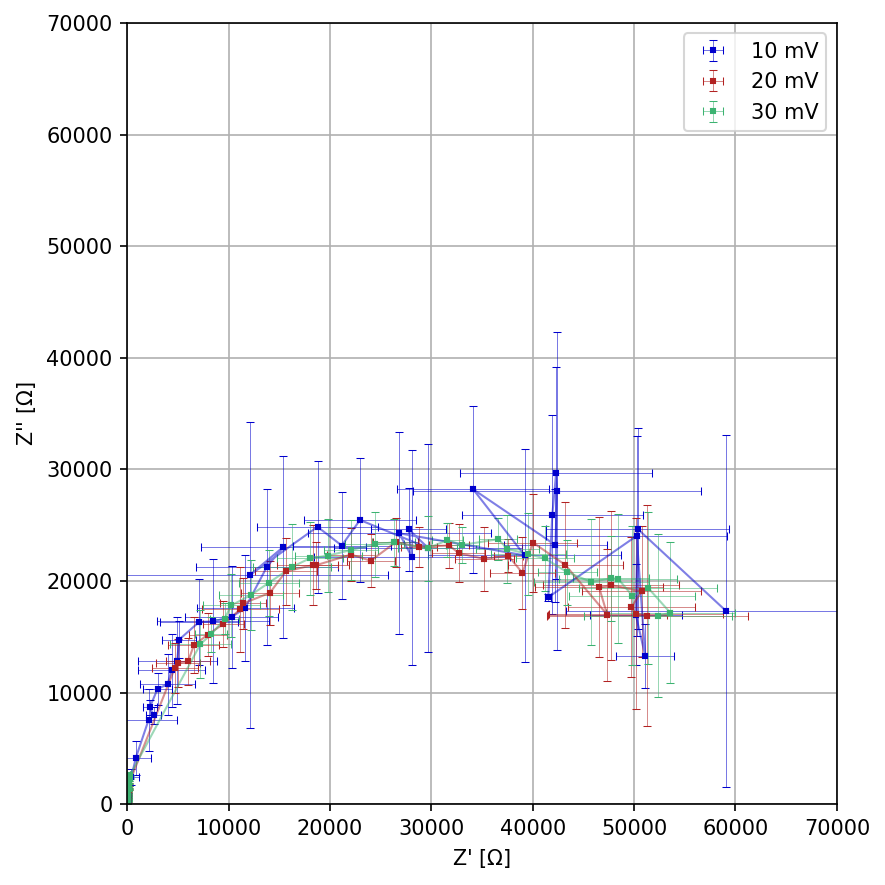

In [8]:
# Nyquist Plot

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

    mask =  ((CS_df_10mV_means.index < 30) | (CS_df_10mV_means.index > 100))  # Only keep those frequencies above 10 Hz
    ax.errorbar(x=(CS_df_10mV_means[mask])["Z'"].to_numpy(), y=(-CS_df_10mV_means[mask])["Z''"].to_numpy(), 
            xerr=(CS_df_10mV_err[mask])["Z"].to_numpy(), yerr=(CS_df_10mV_err[mask])["Z"].to_numpy(),             
            color='mediumblue', markersize=2, 
            fmt = 's', ecolor="mediumblue", elinewidth=0.250, capsize=2, capthick=0.50,
            label="10 mV")
    ax.errorbar(x=(CS_df_20mV_means[mask])["Z'"].to_numpy(), y=(-CS_df_20mV_means[mask])["Z''"].to_numpy(), 
            xerr=(CS_df_20mV_err[mask])["Z"].to_numpy(), yerr=(CS_df_20mV_err[mask])["Z"].to_numpy(),             
            color='firebrick', markersize=2, 
            fmt = 's', ecolor="firebrick", elinewidth=0.250, capsize=2, capthick=0.50,
            label="20 mV")
    ax.errorbar(x=(CS_df_30mV_means[mask])["Z'"].to_numpy(), y=(-CS_df_30mV_means[mask])["Z''"].to_numpy(), 
            xerr=(CS_df_30mV_err[mask])["Z"].to_numpy(), yerr=(CS_df_30mV_err[mask])["Z"].to_numpy(),             
            color='mediumseagreen', markersize=2, 
            fmt = 's', ecolor="mediumseagreen", elinewidth=0.250, capsize=2, capthick=0.50,
            label="30 mV")    
    ax.plot((CS_df_10mV_means[mask])["Z'"].to_numpy(), (-CS_df_10mV_means[mask])["Z''"].to_numpy(), 's-',
            linewidth=1, alpha=0.5, color='mediumblue', markersize=2)
    ax.plot((CS_df_20mV_means[mask])["Z'"].to_numpy(), (-CS_df_20mV_means[mask])["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='firebrick', markersize=2)
    ax.plot((CS_df_30mV_means[mask])["Z'"].to_numpy(), (-CS_df_30mV_means[mask])["Z''"].to_numpy(), 's-', 
            linewidth=1, alpha=0.5, color='mediumseagreen', markersize=2)
    
    ax.set_xlabel(r"Z' $[\Omega]$")
    ax.set_ylabel(r"Z'' $[\Omega]$")
    #ax.set_title('Nyquist Plot w/ unfiltered data, not showing errorbars')
    ax.legend(loc='upper right')

    ax.grid(True)
    ax.set_xlim(left=0, right=70000)
    ax.set_ylim(bottom=0, top=70000)
    #ax.axis('equal') # Important for Nyquist plots

plt.tight_layout()
plt.show()